**Importing Modules**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read CSV File into dataframe**

In [7]:
df = pd.read_csv('Customer Churn.csv')

**Check Data for Anomalies**

In [8]:
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


OBSERVATION: 

No Null values
All variables are categorical variables, except for Tenure, Age, Monthly & Total Chargers

**Change Total Charges to Float Value**
Incorrect data type

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Impute Missing Values for Total Charges**

In [12]:
mean_total_charges = df.TotalCharges.mean()
df['TotalCharges'] = df['TotalCharges'].fillna(mean_total_charges)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Creating Categoricals/Bins for Montly and Total Charges**

In [13]:
df['MonthlyCharges_group'] = pd.qcut(df['MonthlyCharges'], q=3, labels=['low', 'middle', 'high'])
df['TotalCharges_group'] = pd.qcut(df['TotalCharges'], q=3, labels=['low', 'middle', 'high'])

**EXPLORATORY DATA ANALYSIS**

**Overall Churn**

In [15]:
df.Churn.value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Churn is 26.5%

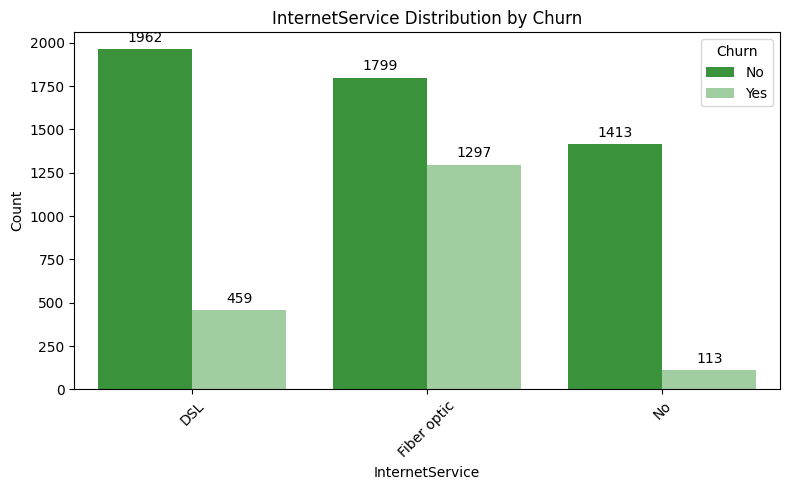

Churn rate for InternetService:
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64



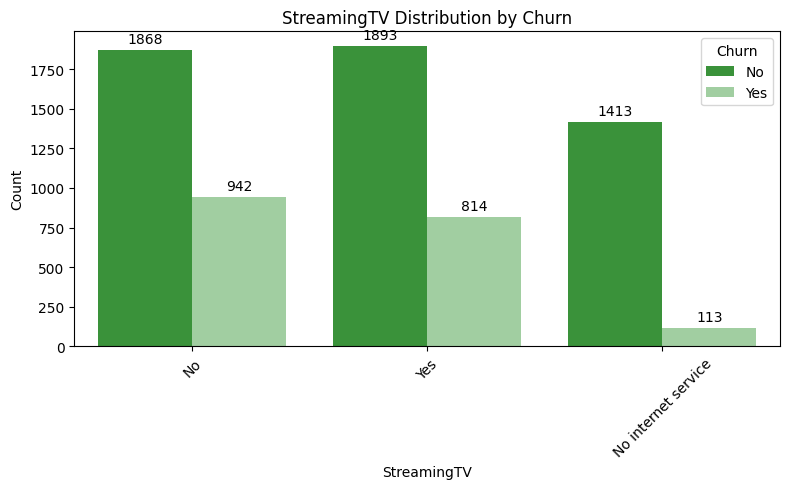

Churn rate for StreamingTV:
StreamingTV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Churn, dtype: float64



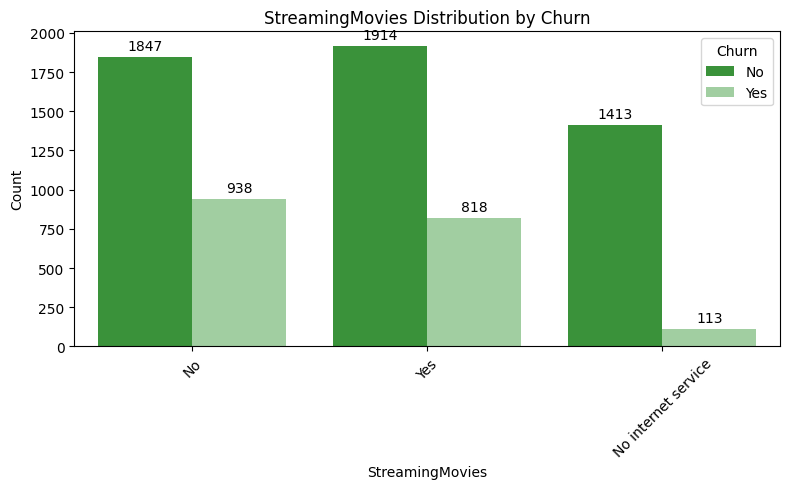

Churn rate for StreamingMovies:
StreamingMovies
No                     0.336804
No internet service    0.074050
Yes                    0.299414
Name: Churn, dtype: float64



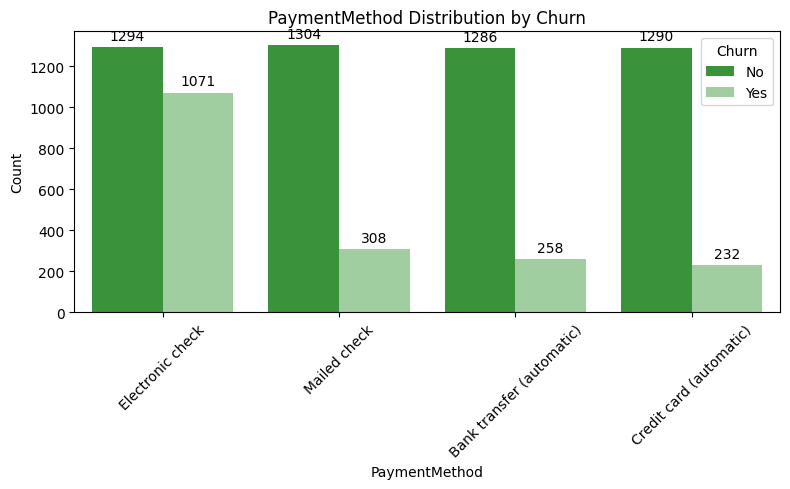

Churn rate for PaymentMethod:
PaymentMethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn, dtype: float64



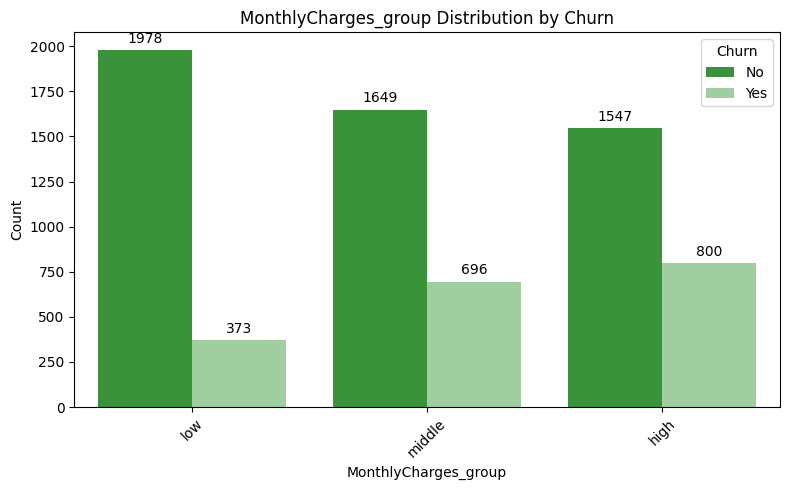

/var/folders/pp/fw2xszg126qcvrdq3_97gp0w0000gn/T/ipykernel_10462/770162502.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(independent)['Churn'].apply(lambda x: (x=="Yes").mean())


Churn rate for MonthlyCharges_group:
MonthlyCharges_group
low       0.158656
middle    0.296802
high      0.340861
Name: Churn, dtype: float64



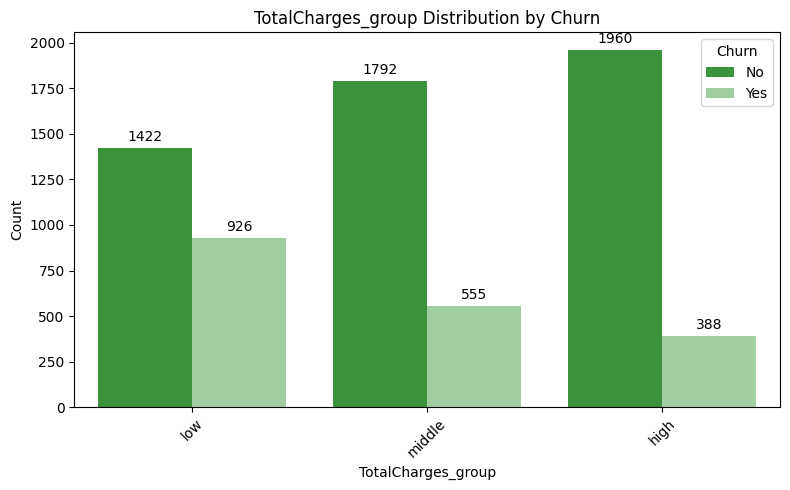

/var/folders/pp/fw2xszg126qcvrdq3_97gp0w0000gn/T/ipykernel_10462/770162502.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(independent)['Churn'].apply(lambda x: (x=="Yes").mean())


Churn rate for TotalCharges_group:
TotalCharges_group
low       0.394378
middle    0.236472
high      0.165247
Name: Churn, dtype: float64



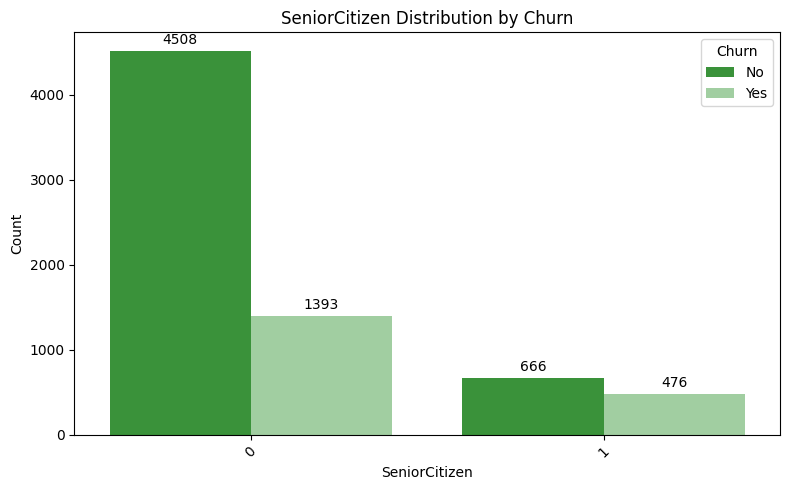

Churn rate for SeniorCitizen:
SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64



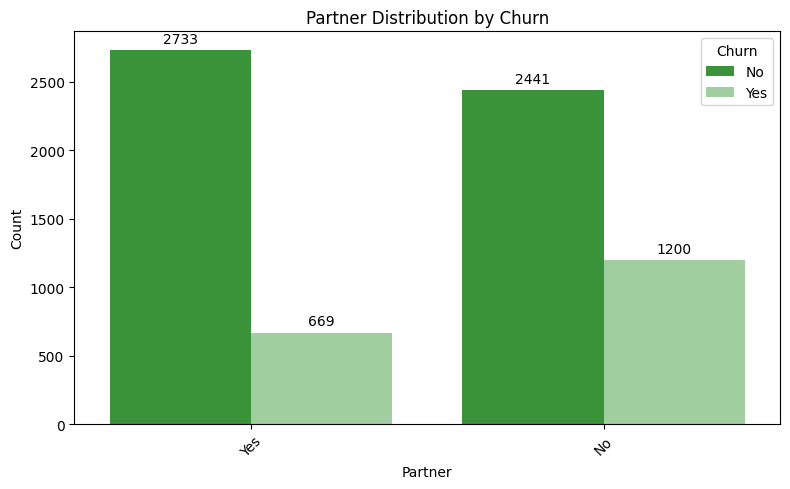

Churn rate for Partner:
Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64



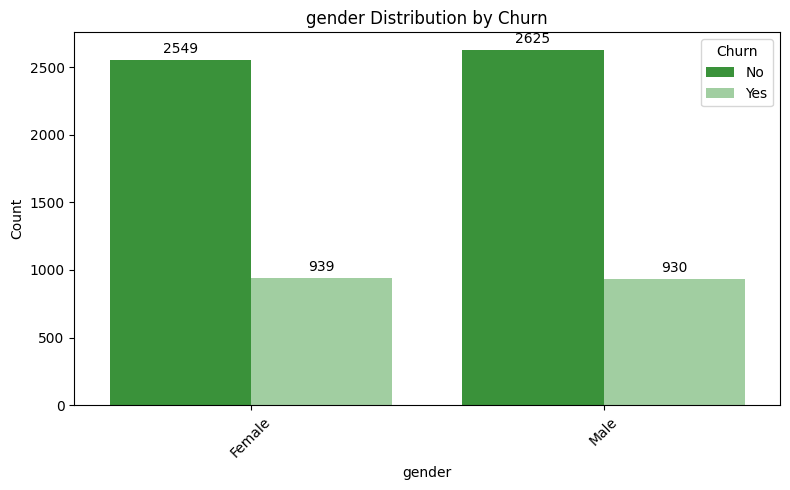

Churn rate for gender:
gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64



In [26]:
independents = ['InternetService', 'StreamingTV', 'StreamingMovies', 'PaymentMethod',
    'MonthlyCharges_group', 'TotalCharges_group', 'SeniorCitizen', 'Partner', 'gender']

green_palette = sns.color_palette(["#2ca02c", "#99d699"])

for independent in independents:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=independent, hue='Churn', palette=green_palette)
    for p in ax.patches:
        height = p.get_height()
        if height > 0: ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')
    
    plt.xticks(rotation=45)
    plt.title(f'{independent} Distribution by Churn')
    plt.xlabel(independent)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()
    
    # Calculate churn rate per category
    churn_rate = df.groupby(independent)['Churn'].apply(lambda x: (x=="Yes").mean())
    print(f'Churn rate for {independent}:\n{churn_rate}\n')